Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 06: Hough Transform

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, December 16, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

Mapping (i.e. multiplying with the matrix) an eigenvector will result a scaled version of that vector, i.e. it may change length and orientation, but not its direction in space. Formally, an eigenvector $v$ fulfills
$$A\cdot v=\lambda v\qquad\text{for some scalar $\lambda\in\mathbb{R}$}$$
The scalar $\lambda$ is called the eigenvalue belonging to the eigenvector $v$.

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

The characteristic polynomial of a $n\times n$-matrix $A$ is defined as
$$p_A(X) = \det(X\cdot\mathbf{I}_n-A)$$
where $\mathbf{I}_n$ is the identity matrix and $\det$ the determinant. It is a polynomial of degree $n$, that is invariant under matrix similarity. The roots of the characteristic polynomial are the eigenvalues of the matrix.
The algebraic multiplicity of an eigenvalue $\lambda$ is its multiplicity as a root of the characteristic polynomial.

For every eigenvalue, there may be multiple eigenvectors, that span a subspace called the eigenspace for that eigenvector. The geometric multiplicity of an eigenvalue is the dimension of the corresponding eigenspace. The geometric multiplicity cannot exceed the algebraic multiplicity.

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

The spectrum of a matrix is the set of its eigenvalues. The spectral theorem states under which conditions there is diagonalizable and provides a cannonical decomposition, referred to es eigendecomposition. For example every real symmetric square matrix is diagonalizable. The diagonalization $A=VDV^T$ has a diagonal matrix having the eigenvalues in the diagonal and the matrix $V$ has the corresponding eigenvectors as columns.

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

## Assignment X: Interactive Hough transform

<IPython.core.display.Javascript object>


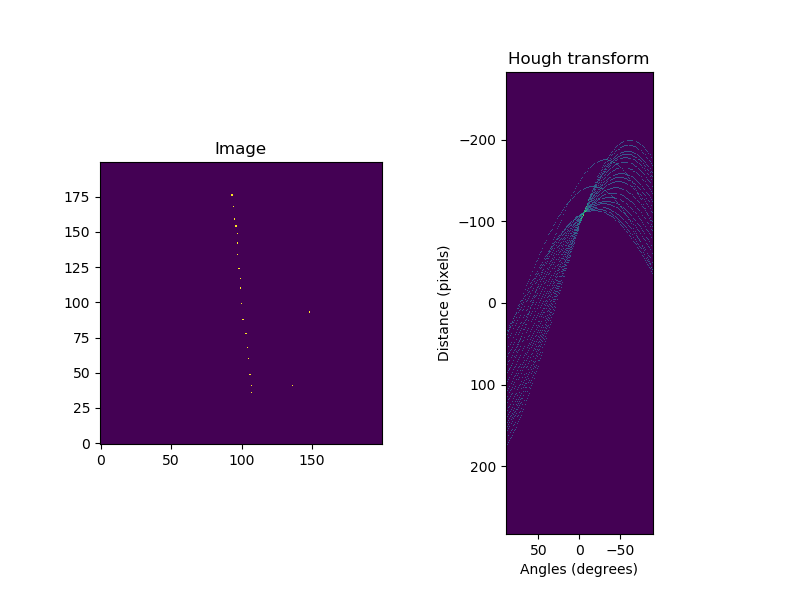

6

In [3]:
%matplotlib notebook
from skimage.transform import hough_line
import matplotlib.pyplot as plt
import numpy as np

# True if two mouse clicks should draw a line, false if single clicks draw points
lines = False


steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])
img = np.zeros((200,200))


def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1
    

def disp_and_comp():
    """Computes Line Hough transform; displays image and result
    
    Args:
    
    Returns:
    
    """
    ax1.imshow(img, origin = 'lower')
    
    out, angles, d = hough_line(img)
    ax2.imshow(np.log(1 + out), extent=[np.rad2deg(angles[-1]), np.rad2deg(angles[0]), d[-1], d[0]], origin = 'lower')
    
    fig.canvas.draw()

    
first_point = True
p1 = (0,0)
def on_press(event):
    """Draws either line or point and calls disp_and_comp
    
    Reacts to mouse clicks. Draws either point at mouse
    position and computes Hough transform or draws line
    between first and second mouse click and then computes
    hough transfom.
    
    Args:
        event (event): Mouseevent.
    
    Returns:
    
    """
    global p1, first_point
    y = int(event.xdata)
    x = int(event.ydata)
    
    if (lines):
        if (first_point):
            p1 = (x,y)
            img[x, y] = 255
            first_point = False
        else:
            line(img,p1,(x,y)) 
            first_point = True
        disp_and_comp()
    else:
        img[x, y] = 255
        disp_and_comp()
    
    

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(121)
plt.title('Image')

ax2 = fig.add_subplot(122)
plt.title('Hough transform');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')

disp_and_comp()
fig.canvas.mpl_connect('button_press_event', on_press)


## Assignment 1: Hough transform [6 Points]

**a)** Explain in your own words the idea of Hough transform. What is an accumulator space? In what sense can the Hough transform be seen as a model-based approach?

Hought transform looks for a given shape, e.g. line or circle, in an image and sums up all evidence in an accumulator space. The shape of the accumulator space depends on the representation for the shape, e.g. 2d for lines (angle and distance in Hesse representation) or 3d for circles (x,y position and radius). The shape can be considered of the model to be searched for in the image data.

**b)** What is linear Hough transform? What does a point in the linear Hough space represent? Explain the meaning of the two coordinates.

Linear Hough transforms aims at finding lines in an image. They are represented in Hesse form (angle and distance) in the accumulator space. A single point can be on multiple lines and results in a sine curve in the accumulator space. Lines will result in a maximal point in the accumulator space.

A point in the Hough space (accumulator space) represents (an indicator) for a line in the original space.

**c)**  How are points, lines, polygons transformed by linear Hough transform? What about parallel lines? Try different configurations using the functions `point`, `line`, `polygon` below. Use the function `skimage.transform.hough_line` to display these examples.

 Polygons will give multiple (local) maximal points. Parallel lines will have the same angle and hence result in points with same x-coordinate (angle) in the accumulator space. 

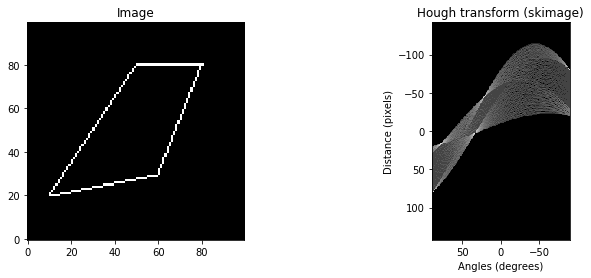

In [2]:
from skimage.transform import hough_line
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])

def point(img, p):
    """Insert a point in the black/white image at position p
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of point.
    
    Returns:
    
    """
    img[p] = 1

def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1

def polygon(img, vertices):
    """Insert a (closed) polygon given by a list of points into the black/white image
    
    Args:
        img (ndarray): Input image.
        vertices (list): List of coordinate tuples.
    
    Returns:
    
    """
    for p, q in zip(vertices, vertices[1:]+vertices[0:1]):
        line(img,p,q)

img = np.zeros((100,100))

# BEGIN SOLUTION
case = 5
if case == 0: # point
    point(img, (10,10))
elif case == 1: # multiple points
    point(img, (10,10))
    point(img, (20,40))
elif case == 2: # line
    line(img,(10,10),(70,70))
elif case == 3: # multiple lines
    line(img,(10,10),(70,70))
    line(img,(10,70),(70,10))
elif case == 4: # parallel lines
    for i in (20,40,60):
        line(img,(10,i),(70,i))
elif case == 5: # polygon
    polygon(img,[(20,10),(80,50),(80,80),(30,60)])
# END SOLUTION

plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1,2,1) ; plt.title('Image'); plt.imshow(img, origin = 'lower')

out, angles, d = hough_line(img)
plt.subplot(1,2,2) ; plt.title('Hough transform (skimage)');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.imshow(np.log(1 + out), extent=[np.rad2deg(angles[-1]), np.rad2deg(angles[0]), d[-1], d[0]], origin = 'lower')

## Assignment 2: Implementing Hough transform [7 Points]

**a)** Implement your own version of linear Hough transform and compare the results with the function `skimage.transform.hough_line`.

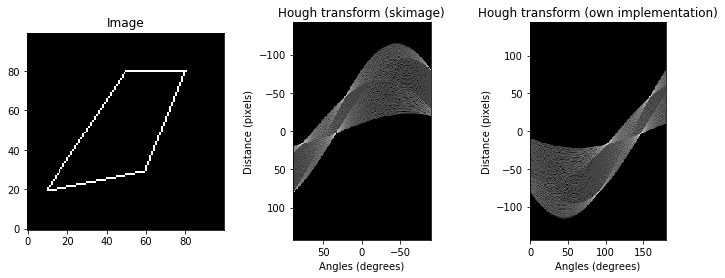

In [3]:
from skimage.transform import hough_line
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def my_hough_line(img, angles=180):
    """
    Apply linear Hough transform to the given image.
    
    Args:
        img (numpy.ndarray): The binary image to transform
        angles (int): The number of angles to consider.
    Result:
        accumulator (numpy.ndarray): The accumulator space.
    """
    # BEGIN SOLUTION
    # Calculate maximal length in the array.
    d_max = int(np.ceil(np.linalg.norm(img.shape)))
    # Initialize accumulator space.
    accumulator = np.zeros((2 * d_max, angles), dtype=np.uint64)
    # Create array for all angles we want to look at.
    theta = np.arange(angles, dtype='int')
    # Convert degrees to radiants.
    theta_radiant = np.deg2rad(theta)
    # For each white pixel in the image, 
    # calculate the distance to the origin 
    # and increment accumulator space for the distance and all angles.
    for r, c in np.argwhere(img):
        d = np.floor(c * np.cos(theta_radiant) + r * np.sin(theta_radiant))
        d = d.astype(int)
        accumulator[d + d_max, theta] += 1
    # END SOLUTION
    return accumulator


img = np.zeros((100,100))

# You may try different paintings here:
#point(img, (10,10))
#line(img,(10,20),(70,20))
polygon(img,[(20,10),(80,50),(80,80),(30,60)])


plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1,3,1) ; plt.title('Image'); plt.imshow(img, origin = 'lower')

out, angles, d = hough_line(img)
plt.subplot(1,3,2) ; plt.title('Hough transform (skimage)');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.imshow(np.log(1 + out), extent=[np.rad2deg(angles[-1]), np.rad2deg(angles[0]), d[-1], d[0]], origin = 'lower')


my_out = my_hough_line(img)
plt.subplot(1,3,3) ; plt.title('Hough transform (own implementation)');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.imshow(np.log(1+my_out), extent=[0, 180, -144, 144])
plt.show()

**b)** Under which conditions is (linear) Hough transform invertible? Try to implement an inverse linear Hough transform. 

You could create a line for each point in accumulator space by doing the following: Compute angle and distance of the line represented by the current point in accumulator space. Add the value of this point to all image pixels which belong to the corresponding line. Finally you could threshold the image. 

However, other solution are feasible, too.


A point in the Hough space (accumulator space) can be seen as an indicator for a line in the original space. To invert the Hough transform, one has to accumulate these indicators, i.e. lines in the pixel space. An exact inversion will usually not be possible, due to discretization effects.

KeyboardInterrupt: 

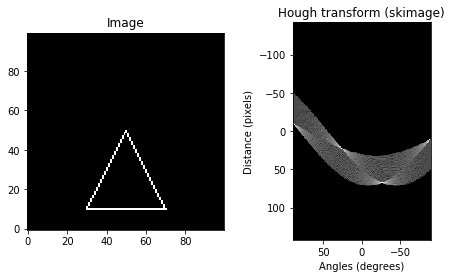

In [4]:
from skimage.transform import hough_line
import matplotlib.pyplot as plt
import numpy as np


# BEGIN SOLUTION
def my_line(img, distance, angle, value=1):
    """Draw a line provided in Hesse form, i.e. by normal angle and distance.
    Not very efficient, but simple.
    
    Args:
        img (numpy.ndarray): An image where the line should be added
        distance (float): The distance from the origin
        angle (float): The angle of the line
        value (int): The strength of the line
    """
    s = np.sin(angle)
    c = np.cos(angle)
    if abs(c) > abs(s):
        x0 = distance/c
        for y in range(img.shape[0]):
            x = int(np.round(x0 - y*s/c))
            if x >= 0 and x < img.shape[1]:
                img[y,x] += value
    else:
        y0 = distance/s
        for x in range(img.shape[1]):
            y = int(np.round(y0 - x*c/s))
            if y >= 0 and y < img.shape[0]:
                img[y,x] += value
# END SOLUTION

def my_inverse_hough_line(accumulator, shape):
    """Compute an inverse Hough transform, i.e. compute the image from the accumulator space.
    
    Args:
        accumulator (numpy.ndarray)
        shape (tuple): The shape (dimensions) of the image to be created

    Result:
        img (numpy.ndarray): The image created from the accumulator space.
    """
    img = np.zeros(shape, np.uint64)
    
    # BEGIN SOLUTION    
    for d,a in np.argwhere(accumulator):
        val = accumulator[d,a]
        distance = d-accumulator.shape[0]//2
        angle = (a/accumulator.shape[1] - .5) * np.pi
        my_line(img,distance,angle,val)
    # END SOLUTION
    return img

img = np.zeros((100,100))

#point(img, (10,10))
#line(img,(10,20),(70,20))
#line(img,(20,10),(20,70))
polygon(img,[(10,30),(50,50),(10,70)])

plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1,3,1) ; plt.title('Image'); plt.imshow(img, origin = 'lower')

out, angles, d = hough_line(img)
plt.subplot(1,3,2) ; plt.title('Hough transform (skimage)');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.imshow(np.log(1 + out), extent=[np.rad2deg(angles[-1]), np.rad2deg(angles[0]), d[-1], d[0]])

img2 = my_inverse_hough_line(out, img.shape)
plt.subplot(1,3,3) ; plt.title('Inverse Hough transform');
plt.imshow(img2, origin = 'lower')
plt.show()

## Assignment 3: Circular Hough [7 Points]

**a)** Explain the idea of circular Hough transform. How many dimensions does the accumulator space have and what do they represent? What practical problems do you expect when computing circular Hough transform?

The accumulator space has three dimensions $x_c$, $y_c$, and $r$, with $x_c$ and $y_c$ spanning the image plan and $r$ being the radius. In practice circles of a fixed radius are searched, limiting the accumulator space to the image plane.

Not limiting the search to a fixed radius would make circular Hough transform computational complex: For each edge pixel the counters along all circles which are centered at this pixel need to be incremented.

**b)** Now implement circular hough transform. First think how the accumulator space should be represented. You may provide an additional parameter to only look for circles of a given radius (or a range of radii). Then apply it to the image `xmas.png` to detect the balls. Mark them in the original image. (Bonus task: also detect the presents using linear Hough transform).

In [ ]:
from skimage.transform import hough_line
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

# load the image
img = plt.imread('images/xmas.png')

# BEGIN SOLUTION

# The radii of circles to be detected by the hough transform
radii = range(5, 15)

# xx and yy are 200x200 tables containing the x and y coordinates as values
# mgrid is a mesh creation helper
xx, yy = np.mgrid[:200, :200]
# circles contains the squared distance to the (100, 100) point
# we are just using the circle equation learnt at school
d2 = (xx - 100)**2 + (yy - 100)**2

# create circle shapes
circles = []
for r in radii:
    circle = (d2 < ((r + 1)**2)) & (d2 > ((r - 1)**2))
    circles.append(circle[100 - r - 1:100 + r + 1, 100 - r - 1:100 + r + 1])


# simple implementation:
def add_mask1(space, circle, x, y):
    """
    Add a given mask (circle) to the accumulator space.
    
    Args: 
        space (ndarray): Accumulator space.
        circle (tuple)
        x (uint): Coordinate.
        y (uint): Coordinate.
    """
    x -= circle.shape[1] // 2
    y -= circle.shape[0] // 2
    for r, c in circle.where():
        if r >= y and c >= y and r + y < space.shape[0] and c + y < space.shape[1]:
            space[r + y, c + x] += 1


# alternative implementation:
def add_mask2(space, mask, position, offset=(0, 0)):
    """
    Add a given mask to the accumulator space.
    
    Args: 
        space (ndarray): Accumulator space.
        mask (ndarray)
        position (tuple)
        offset (tuple)
    
    """
    position = np.subtract(position, offset)
    space_min = np.maximum(position, 0)
    mask_min = np.maximum(-position, 0)
    space_max = np.minimum(space.shape, np.add(position, mask.shape))
    mask_max = np.minimum(np.subtract(space.shape, position), mask.shape)
    space[space_min[0]:space_max[0], space_min[1]:space_max[1]] += mask[
        mask_min[0]:mask_max[0], mask_min[1]:mask_max[1]]


def circular_hough(img, masks, radii):
    """ Computes circular hough transform
    
    Args:
        img (ndarray): Input image.
        masks (list): List of circles.
        radii (list): List of raddii.
        
    Returns:
        accumulator (ndarray): Accumulator space.
    """
    # Create the accumulator space. This space will have three dimensions:
    # the x- and y-coordinate of the circle and its radius.
    accumulator = np.zeros(
        (len(radii), img.shape[0], img.shape[1]), dtype=np.int64)

    for r, c in np.argwhere(img):
        for i, radius in enumerate(radii):
            add_mask2(accumulator[i], circles[i], (r, c),
                      (radius + 1, radius + 1))
    return accumulator


# and perform circular hough transform
accumulator = circular_hough(img, circles, radii)

# Analyze the accumulator space
out = np.zeros(img.shape, np.int64)
for i, radius in enumerate(radii):
    max_fit = np.count_nonzero(circles[i])
    level = round(0.9 * max_fit)
    print("radius = {}, max = {}/{}, better than {}: {}".format(
        radius, accumulator[i].max(), max_fit, level,
        np.count_nonzero(accumulator[i] > level)))

    for r, c in np.transpose(np.where(accumulator[i] > level)):
        add_mask2(out, circles[i], (r, c), (radius + 1, radius + 1))

plt.gray()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out)
plt.show()

# END SOLUTION

## Assignment 4: Application: Eye detection [Bonus]

**Bonus:** If you do this exercise, you may leave out one of the others.

**a)** It was suggested in the lecture, that circular Hough transform can be used to implement a simple
form of “eye tracking”. Try this using your webcam.

Hints:
* You may start with a single snapshot (or some other image of a face from wherever you like) before applying your function to a video stream.
* You may start using functions like `hough_circle` from `skimage.transform`, which implement circular Hough transform.
* You may try to apply some preprocessing to detect edges or regions prior to Hough transform (you may use anything you know from the lecture).
* `hough_circle` may be inappropriate, as it is designed to detect full circles, while eyes are often partially occluded. You may implement your own Hough transforms, which detects this kind of incomplete circles.
* You may apply additional knowledge to detect eyes, e.g. that they usually occur in pairs. You may also use the approximate size and position from last frame.

In [ ]:
import cv2
import numpy as np
from cvloop import cvloop

# Depending on your webcam you might need to adapt parameters, to make
# the solution work on your machine.



def detect_eyes(img):
    """Find pairs of eyes in image based on circular Hough transform.
    
    Args:
        img (ndarray): The RGB input image to detect the eyes in. shape=(h, w, 3)
        
    Returns:
        ndarray: The image with detected eyes highlighted.
    
    """
    # BEGIN SOLUTION
    
    # Smooth image to reduce false positives.
    img_blurred = cv2.medianBlur(img, ksize=5)
    # Convert image to grayscale uint8.
    img_blurred_gray = cv2.cvtColor(img_blurred, cv2.COLOR_RGB2GRAY)
    # Detect circles via Hough transform.
    circles = cv2.HoughCircles(
        img_blurred_gray,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=60,
        param1=10,
        param2=28,
        minRadius=10,
        maxRadius=30)

    if circles is not None:
        circles = filter_eyes(circles)
        print('eyes', circles)
        if circles is not None:
            # Round back to integer coordinates.
            circles = np.uint16(np.around(circles))
            # Hightlight eyes in the image.
            for eye in circles:
                # Draw the outer circle.
                cv2.circle(img, (eye[0], eye[1]), eye[2], (0, 255, 0), 2)
                # Draw the center of the circle.
                cv2.circle(img, (eye[0], eye[1]), 2, (0, 0, 255), 3)
    return img


def filter_eyes(circles):
    """Filter out circles that could be eyes from all detected eyes.
    
    Args:
        circles (ndarray): Centers and size of detected circles. shape=(1 x n_circles x 3)
        
    Returns:
        ndarray: Two coordinates and sizes for circles that could account for eyes or None if 
            no candidates could be found. shape=(2 x 3)
    """
    THRESH = 20  # Maximal deviation of eyes in y direction.
    EXPECTED_EYE_DISTANCE = 70  # Expected distance of eyes in x direction.
    circles = circles[0]  # get 3 x 3 array
    y_coords = circles[:, 1]
    eye_candidates = []
    # Find eye candidates based on similar horizontal level.
    for i in range(y_coords.size):
        for j in range(y_coords.size):
            if (j != i and [i, j] not in eye_candidates
                    and [j, i] not in eye_candidates):
                if (abs(y_coords[i] - y_coords[j])) < THRESH:
                    eye_candidates.append([i, j])
    # Take the candidates whose x distance is closest to the expected distance.
    if eye_candidates:
        differences_to_expected = []
        for i, j in eye_candidates:
            diff = abs(
                EXPECTED_EYE_DISTANCE - abs(circles[i, 0] - circles[j, 0]))
            differences_to_expected.append(diff)
        eyes_idx = np.argmin(np.array(differences_to_expected))
        eyes = np.take(circles, eye_candidates[eyes_idx], axis=0)
        return eyes
    else:
        return None

    # END SOLUTION

cvl = cvloop(function=detect_eyes)